In [0]:
import numpy as np

import matplotlib.pyplot as plt

In [0]:
datos = np.genfromtxt('15_11_Jose.TXT')
cronom= np.genfromtxt('bitac.txt')

color=[(60/255.0, 180/255.0, 75/255.0), (0/255.0, 130/255.0, 200/255.0), (50/255.0, 240/255.0, 255/255.0), (240/255.0, 50/255.0, 230/255.0), 
       (250/255.0, 190/255.0, 190/255.0), (0/255.0, 128/255.0, 128/255.0), (240/255.0, 195/255.0, 255/255.0), (170/255.0, 110/255.0, 40/255.0),
       (255/255.0, 225/255.0, 25/255.0), (128/255.0, 0/255.0, 0/255.0), (230/255.0, 25/255.0, 75/255.0), (245/255.0, 130/255.0, 48/255.0),
       (0/255.0, 0/255.0, 128/255.0), (135/255.0, 200/255.0, 220/255.0), (250/255.0, 195/255.0, 105/255.0)]

font = {'family' : 'serif', 'weight' : 'normal'}

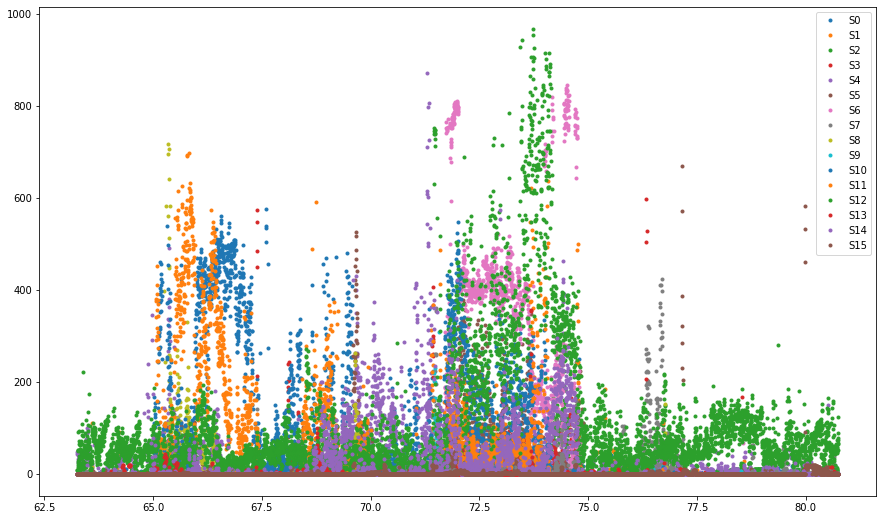

In [0]:
plt.figure(figsize=(15,9))
for i in range(16): #[2]:#
  plt.plot(datos[:,0]/60000,datos[:,i+1], '.', color=color[i], label='S'+str(i))
  plt.grid()
plt.rc('font', **font)
plt.legend()
plt.show()

In [0]:
cronom

array([[ 1.   ,  1.   , 28.797,  1.   , 28.797],
       [ 2.   ,  7.   , 11.617,  5.   , 42.82 ],
       [ 3.   ,  8.   , 33.689,  1.   , 22.072],
       [ 4.   , 10.   , 24.491,  1.   , 50.802],
       [ 5.   , 11.   , 59.842,  1.   , 35.351],
       [ 6.   , 13.   , 55.07 ,  1.   , 55.228],
       [ 7.   , 15.   , 50.127,  1.   , 55.057],
       [ 8.   , 17.   , 38.256,  1.   , 48.129],
       [ 9.   , 18.   , 20.414,  0.   , 42.158],
       [ 1.   ,  0.   , 20.404,  0.   , 20.404],
       [ 1.   , 18.   ,  0.775, 18.   ,  0.775],
       [ 1.   ,  4.   , 30.526,  4.   , 30.526],
       [ 2.   , 10.   , 52.901,  6.   , 22.375],
       [ 3.   , 13.   , 33.395,  2.   , 40.494],
       [ 4.   , 14.   , 22.96 ,  0.   , 49.565],
       [ 5.   , 17.   , 14.472,  2.   , 51.512],
       [ 6.   , 18.   ,  8.854,  0.   , 54.382]])

In [0]:
t_0_min=cronom[9,1]+cronom[9,2]/60
t_0_seg=cronom[9,1]*60+cronom[9,2]

t_switch_min=cronom[9:11,1]+cronom[9:11,2]/60-t_0_min
t_switch_seg=cronom[9:11,1]*60+cronom[9:11,2]-t_0_seg

t_estaciones_min=cronom[0:8,1]+cronom[0:8,2]/60-t_0_min
t_estaciones_seg=cronom[0:8,1]*60+cronom[0:8,2]-t_0_seg

t_sensor_min=cronom[11:16,1]+cronom[11:16,2]/60-t_0_min
t_sensor_seg=cronom[11:16,1]*60+cronom[11:16,2]-t_0_seg

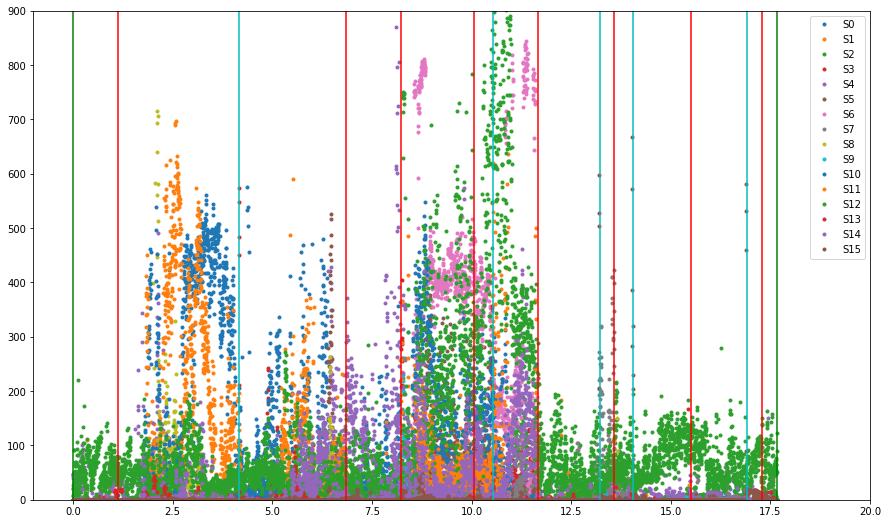

In [0]:
plt.figure(figsize=(15,9))
for i in range(16): #[2]:#
  plt.plot(1.01*(datos[:,0]-datos[0,0])/60000,datos[:,i+1], '.', color=color[i], label='S'+str(i))
  plt.rc('font', **font)
  plt.grid()
plt.axvline(t_switch_min[0], color='g')
plt.axvline(t_switch_min[1], color='g')
for j in range(len(t_estaciones_min)):
  plt.axvline(t_estaciones_min[j],color='r')#, label='estaciones')
for k in range(len(t_sensor_min)):
  plt.axvline(t_sensor_min[k], color='c')

plt.legend(fontsize=20, markerscale=5)
plt.xlim(-1,20)
plt.ylim(0,900)
plt.show()

In [0]:
tiempo_arduino_min=1.01*(datos[:,0]-datos[0,0])/60000
tiempo_arduino_seg=1.01*(datos[:,0]-datos[0,0])/1000

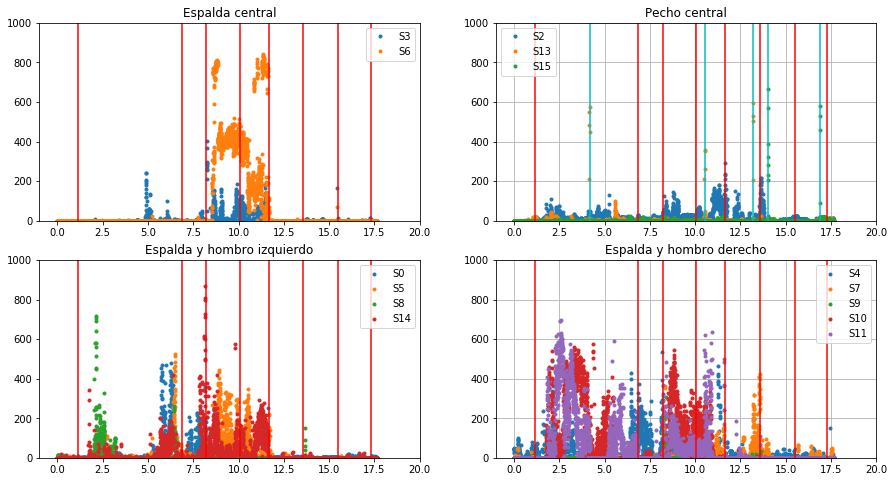

In [0]:
espalda_central = [3,6]
pecho_central = [2,13,15]
espalda_hombro_izq = [0,5,8,14] #tal vez acá viene el 15
espalda_hombro_der = [4,7,9,10,11] #tal vez acá viene el 14

plt.figure(figsize=(15,8))

plt.subplot(2,2,1)
for i in espalda_central: #[2]:#
  plt.plot(tiempo_arduino_min,datos[:,i+1], '.',  color=color[i], label='S'+str(i))
  plt.grid()
for j in range(len(t_estaciones_min)):
  plt.axvline(t_estaciones_min[j],color='r')#, label='estaciones')
plt.rc('font', **font)
plt.title('Espalda central')
plt.legend(fontsize=20, markerscale=5)
plt.xlim(-1,20)
plt.ylim(0,1000)

plt.subplot(2,2,2)
for i in pecho_central: #[2]:#
  plt.plot(tiempo_arduino_min,datos[:,i+1], '.',  color=color[i], label='S'+str(i))
  plt.grid()
for j in range(len(t_estaciones_min)):
  plt.axvline(t_estaciones_min[j],color='r')#, label='estaciones')
for k in range(len(t_sensor_min)):
  plt.axvline(t_sensor_min[k], color='c')
plt.rc('font', **font)
plt.title('Pecho central')
plt.legend(fontsize=20, markerscale=5)
plt.xlim(-1,20)
plt.ylim(0,1000)

plt.subplot(2,2,3)
for i in espalda_hombro_izq: #[2]:#
  plt.plot(tiempo_arduino_min,datos[:,i+1], '.',  color=color[i], label='S'+str(i))
  plt.grid()
for j in range(len(t_estaciones_min)):
  plt.axvline(t_estaciones_min[j],color='r')#, label='estaciones')
plt.rc('font', **font)
plt.title('Espalda y hombro izquierdo')
plt.legend(fontsize=20, markerscale=5)
plt.xlim(-1,20)
plt.ylim(0,1000)

plt.subplot(2,2,4)
for i in espalda_hombro_derecho: #[2]:#
  plt.plot(tiempo_arduino_min,datos[:,i+1], '.',  color=color[i],  label='S'+str(i))
  plt.grid()
for j in range(len(t_estaciones_min)):
  plt.axvline(t_estaciones_min[j],color='r')#, label='estaciones')
plt.rc('font', **font)
plt.title('Espalda y hombro derecho')
plt.legend(fontsize=20, markerscale=5)
plt.xlim(-1,20)
plt.ylim(0,1000)

plt.tight_layout()
plt.show()

In [0]:
## PARA CAMBIAR EL FORMATO DEL TIEMPO DE LAS BITACORAS 
ind = np.arange(1,13)

T_crono = []

for i in ind:
  t_inc = open('Multi Timer{}.txt'.format(i), mode='r')# dtype='str') #'rb' puede que sea modo lectura + "binary mode"
  text=t_inc.read()
  t_inc.close()
  prueba=text.split(';')
  Auxx = []
  num = int(((len(prueba)+1)/2) - 1)
  for j in range(num):
    (h, m, s) = (prueba[1+(2*j)].split(':'))
    aux = (float(int(h) * 3600 + int(m) * 60 + float(s)))/60
    Auxx.append(aux)
  T_crono.append(Auxx)#, float[newx]) #EN MINUTOS

#A qué corresponden cada uno 
ind_comienzo_exp = [1,4,8]
ind_ini_med = [3,7,10]
ind_fin_med = [0,5,9]
ind_toques_S9 = [2,6,11]

"""
for j in range(len(T_crono[10])):
  plt.axvline(T_crono[10][j], color='b')#, label='inicios')
  plt.axvline(T_crono[9][j], color='r')#, label='finales')
for k in range(len(T_crono[11])):
  plt.axvline(T_crono[11][k], color='g',  linestyle='--')#, label='toques')
"""


In [0]:
def loga(x, d, e, f):
  y = 200+d + 180*e*np.log(x-f+1.5)
  #y = f*(1 - e**(-d*x))
  return y

def inversa(y, d, e, f):
  x = np.exp((y-d-200)/(180*e))+f-1.5
  return x

def df_exp(x,params):
  b=params[1]
  c=params[2]
  df=np.zeros(4)
  df[0]=-b*np.exp(-c*x)
  df[1]=1
  df[2]=-(1-np.exp(-c*x))/c
  df[3]=b*np.exp(-c*x)*(np.exp(c*x)-c*x-1)/(c**2)
  return df

def prediccion(params,sigma,tiempo):
  fuerza = np.linspace(0,150,len(tiempo))
  err_f = 0.05
  yp, U, L = np.zeros(len(fuerza)), np.zeros(len(fuerza)), np.zeros(len(fuerza))
  
  for i in range(len(fuerza)):
    yp[i] = loga(fuerza[i], params[0], params[1], params[2])
    U[i] = yp[i]+sigma
    L[i] = yp[i]-sigma
  return(L, U)
  
def conversion(lecturas,L,U,parametros):
  fuerza = np.linspace(0,150,len(lecturas))
  F_medio, F_inf, F_sup = [], [], []
  for lectura in lecturas:
    if inversa(lectura,parametros[0],parametros[1],parametros[2])<0:
      F_medio.append(0)
    else:
      F_medio.append(inversa(lectura,parametros[0],parametros[1],parametros[2]))
    if (U[0]<=lectura)&(U[-1]>=lectura):
      F_inf.append(fuerza[np.where(U>=lectura)[0][0]])
    elif(U[0]>=lectura):
      F_inf.append(0)
    else:
      F_inf.append(150)
    if (L[0]<=lectura)&(L[-1]>=lectura):
      F_sup.append(fuerza[np.where(L>=lectura)[0][0]])
    elif (L[-1]<=lectura):
      F_sup.append(1000)
    else:
      F_sup.append(0)
      
  #inf_sup = np.zeros((2,len(F_sup)))
  inf = np.array(F_medio)-np.array(F_inf)
  sup = np.array(F_sup)-np.array(F_medio)
  return(F_medio,F_inf,F_sup,inf,sup)

#Los parámetros y errores de los ajustes de la calibración para los 16 sensores 

sigma_sensores = [29.539461670534322,
  60.49559731024787,
 36.02294229600317,
  35.68269672817009,
  30.98727302034468,
  37.6528840972345,
  48.18579788284019,
  27.34625409985951,
  31.614848378910125,
  38.63106786188516,
  48.220645509993986,
  34.41971383693343,
 35.46054658331651,
 117.57390633160517,
  43.190491600349496,
 23.304998015326362] #Los sensores 2, 12, 13 y 15 se quedan con los mismos parámetros de antes


parametros = [[-197.53346093820625, 1.33211844966353, 0.0641565727232117],
  [78.56231701708825, 0.8469072085365968, 1.2372170320576283],
 [75.07233363303094, -36.498091576890594, 0.06460933903551455],
   [-411.6590650888969, 1.4132332551700164, -1.744794541271738],
  [-47.54719248417899, 1.1479957758451773, 0.7931257167480763],
  [-305.3603536923224, 1.3946746204534222, -0.7311988822971813],
  [118.64916688983206, 0.8977671206620181, 1.166209260879641],
  [-221.42446010900082, 1.2322276525464884, -0.1547531919645663],
  [-139.40206969906046, 1.2000159762265885, 0.39083694667849794],
  [-48.899476185645824, 1.0729012017778754, 0.8150246552254157],
  [-253.7807941241735, 1.316433045932849, -0.2896776039797057],
  [-147.7069317579681, 1.2525045976189582, 0.3639319763109198],
 [63.07105162735809, 0.9461098559988136, 1.1089271678934591],
 [10.115984223545363, -22.61770449262454, 0.03254169811547916],
 [-40.75024235353535, 1.0353719488769222, 0.8710074314465065],
 [17.718610590559724, -17.57701611164902, 0.017406911989024776]] #Los sensores 2, 12, 13 y 15 se quedan con los mismos parámetros de antes

"""
parametroscuadradosbis = [[75.07233363303094, -36.498091576890594, 0.06460933903551455], 
  [10.115984223545363, -22.61770449262454, 0.03254169811547916], 
  [17.718610590559724, -17.57701611164902, 0.017406911989024776]] #2,13,15
sigma_sensoresbis = [36.02294229600317, 28.452640880464145, 23.304998015326362]
"""
def sliding_mean(data_array, window, error_inf, error_sup):
#    data_array = array(data_array)
    new_list = []
    err_filtrado_inf =[]
    err_filtrado_sup =[]
    for i in range(len(data_array)):
        indices = range(max(i - window + 1, 0),
                        min(i + window + 1, len(data_array)))
        avg = 0
        erri, errs = 0, 0
        for j in indices:
            avg += data_array[j]
            erri += error_inf[j]**2
            errs += error_sup[j]**2
                        
        avg /= float(len(indices))
        err_propi = np.sqrt(erri) / float(len(indices))
        err_filtrado_inf.append(avg-err_propi)
        err_props = np.sqrt(errs) / float(len(indices))
        err_filtrado_sup.append(avg+err_props)
        new_list.append(avg)
           
    return new_list, err_filtrado_inf, err_filtrado_sup
  
def sliding_mean_sin_error(data_array, window):
#    data_array = array(data_array)
    new_list = []
    for i in range(len(data_array)):
        indices = range(max(i - window + 1, 0),
                        min(i + window + 1, len(data_array)))
        avg = 0
        for j in indices:
            avg += data_array[j]
        avg /= float(len(indices))
        new_list.append(avg)

    return new_list

In [0]:
#Conversión a Fuerza, errores y blablá
n_sensores = 16
ini,fin = 21760, 28000
tiempo = 1.01*(datos[:,0]-datos[0,0])/60000
subteB16 = np.zeros((len(tiempo), 17))
for j in range (16):
  subteB16[:,j+1] = UrqB16[ini:fin,j+1]

#L, U = np.zeros((len(tiempo), 16)), np.zeros((len(tiempo), 16))
F_medio = np.zeros((len(tiempo), n_sensores))
F_inf = np.zeros((len(tiempo), n_sensores))
F_sup = np.zeros((len(tiempo), n_sensores))
inf = np.zeros((len(tiempo), n_sensores))
sup = np.zeros((len(tiempo), n_sensores))
for j in range(n_sensores):
  L, U = prediccion(parametros[j], sigma_sensores[j], tiempo)
  #L[:,j], U[:,j] = prediccion(parametros[j], sigma_sensores[j], tiempo)
  F_medio[:,j], F_inf[:,j], F_sup[:,j], inf[:,j], sup[:,j] = conversion(subteB16[:,j+1], L, U, parametros[j])

#Para hacer un medias móviles con una ventana de 20 datos
ventana = 20
s_filt = np.zeros((len(tiempo),n_sensores))
err_sinf_filt = np.zeros((len(tiempo),n_sensores))
err_ssup_filt = np.zeros((len(tiempo),n_sensores))

for j in range(n_sensores):
  s_filt[:,j], err_sinf_filt[:,j], err_ssup_filt[:,j] = sliding_mean(F_medio[:,j], ventana, inf[:,j], sup[:,j])

plt.figure(figsize=(16,6.5))
for j in [0,1,2,3,4,5,6,7,8,9,10,11,12,14,15]:
  #plt.errorbar(tiempo, F_medio[:,j], yerr=[inf[:,j],sup[:,j]], fmt='bo', ecolor='c', label=label_sens[j])
  plt.fill_between(tiempo, F_inf[:,j], F_sup[:,j], color='y', alpha=alpha)
  #plt.fill_between(tiempo, F_medio[:,j]-inf[:,j], F_medio[:,j]+sup[:,j], color='y', alpha=0.4)
  #plt.plot(tiempo, subteB16[:,j+1]*40/1023,'*')#,label=str(i))
  plt.plot(tiempo, F_medio[:,j],'.', color=color[j], markersize=8, label='S'+str(j))
  plt.xlabel('Tiempo [min]')
  plt.ylabel('Fuerza [N]')
  plt.legend(loc='upper right', fontsize=15, markerscale=5)
  plt.rc('font', **font)
  plt.rc('axes',labelsize=25)
  plt.rc('xtick',labelsize=25)
  plt.rc('ytick',labelsize=25)
#plt.xticks(np.arange(0,11))
plt.grid()  
#plt.xlim(0,10)
plt.ylim(0, 60)
plt.savefig('serie_temporal_C15F.png')
plt.show()

plt.figure(figsize=(15,8))
for j in [0,1,2,3,4,5,6,7,8,9,10,11,12,14,15]:
  plt.fill_between(tiempo, F_inf[:,j], F_sup[:,j], color='y', alpha=0.2)
  plt.plot(tiempo, s_filt[:,j], '.', color=color[j], label='Sensor '+str(j))#, yerr=[inf[:,j],sup[:,j]], fmt='bo', ecolor='c', label=label_sens[j])
  plt.rc('font', **font)
  plt.xlabel('Tiempo (min)', fontsize=25)
  plt.ylabel('Fuerza (medias móviles) (N)', fontsize=25)
  plt.legend(fontsize=15, markerscale=5)#plt.legend(loc='upper right')
  plt.rc('axes',labelsize=25)
  #plt.yticks(fontsize=17) #[0, 200, 400, 600, 800, 1000]
  #plt.xticks(fontsize=17)
#plt.xlim(2,14)
plt.ylim(0, 50)
plt.grid()

#plt.savefig('15_11_F_medias_móviles.png')
plt.show()

In [0]:
#Histogrameamos las fuerzas en todo el viaje

Fuerza1concat=[]

xlimd, xlimu = 0, 51
ylimd, ylimu= 0, 0.03

for i in [0,2,3,4,5,6,7,9,10,11,13,14]:#range(15):
  Fuerza1concat=np.concatenate([F_medio[:,i],Fuerza1concat])

#densidad = [14/1.56, 14/1.46, 14/1.38]
orde = 3

n1, bins1, patches1 = plt.hist(Fuerza1concat,  bins=np.arange(0,81)*0.5)
prom = sum(Fuerza1concat)/sum(n1[1:])
mediana = np.median(Fuerza1concat[Fuerza1concat>0])
plt.figure(figsize=(12,7))
plt.rc('font', **font)
#plt.title('Experimento controlado - Muri moviéndose - Convertido a Fuerza', fontsize=30)
plt.rc('axes',labelsize=25)
plt.rc('xtick',labelsize=17)
plt.rc('ytick',labelsize=17)
plt.rc('legend',fontsize=18)
n1norm, bins1, patches1 = plt.hist(Fuerza1concat,  bins=np.arange(0,100)*0.5, density=True, label='Promedio pesado = '+str(round(prom,2))+', Mediana = '+str(round(mediana,2)))#, label='densidad='+str(round(densidad[0],2))+r' p/m$^2$')
#plt.plot(bins1[:-1], n1norm, 'o', label='Area ='+str(prom))#str(round(a1,orde)))
plt.legend(loc='upper center')
plt.xlabel('Fuerza [N]')
plt.yscale("log")
plt.xlim(xlimd, xlimu)
plt.ylim(ylimd, ylimu)

plt.tight_layout()
#plt.savefig('hist.png')
plt.show()

In [0]:
#Grafico la serie temporal por zonas del cuerpo

espalda_central = [1,3,5,6,8,10]
pecho_central = [12,13]
espalda_hombro_izq = [0,2,4,14] #tal vez acá viene el 15
espalda_hombro_der = [7,9,11,15] #tal vez acá viene el 14

xlim = [0,8]
ylim = [0,50]

plt.figure(figsize=(21,10))

plt.subplot(2,2,1)
for j in espalda_central: #[2]:#
  plt.fill_between(tiempo, F_inf[:,j], F_sup[:,j], color='y', alpha=0.4)
  #plt.plot(tiempo, subteB16[:,j+1]*40/1023,'*')#,label=str(i))
  plt.plot(tiempo, F_medio[:,j],'.', color=color[j], markersize=6, label='S'+str(j))
  plt.xlabel('Tiempo (min)')
  plt.ylabel('Fuerza (N)')
  plt.legend(loc='upper right', fontsize=15, markerscale=5)
  plt.rc('font', **font)
  plt.rc('axes',labelsize=25)
  plt.rc('xtick',labelsize=25)
  plt.rc('ytick',labelsize=25)
  plt.rc('legend',fontsize=18)
#for j in range(len(t_estaciones_min)):
#  plt.axvline(t_estaciones_min[j],color='r')#, label='estaciones')
plt.grid()
plt.rc('font', **font)
plt.title('Espalda central',fontsize=20)
plt.legend(fontsize=20, markerscale=5)
plt.xlim(xlim)
plt.ylim(ylim)

plt.subplot(2,2,2)
for j in pecho_central: #[2]:#
  plt.fill_between(tiempo, F_inf[:,j], F_sup[:,j], color='y', alpha=0.4)
  #plt.plot(tiempo, subteB16[:,j+1]*40/1023,'*')#,label=str(i))
  plt.plot(tiempo, F_medio[:,j],'.', color=color[j], markersize=6, label='S'+str(j))
  plt.xlabel('Tiempo (min)')
  plt.ylabel('Fuerza (N)')
  plt.legend(loc='upper right', fontsize=15, markerscale=5)
  plt.rc('font', **font)
  plt.rc('axes',labelsize=25)
  plt.rc('xtick',labelsize=25)
  plt.rc('ytick',labelsize=25)
  plt.rc('legend',fontsize=18)
#for j in range(len(t_estaciones_min)):
#  plt.axvline(t_estaciones_min[j],color='r')#, label='estaciones')
#for k in range(len(t_sensor_min)):
#  plt.axvline(t_sensor_min[k], color='c')
plt.grid()
plt.rc('font', **font)
plt.title('Pecho central',fontsize=20)
plt.legend(fontsize=20, markerscale=5)
plt.xlim(xlim)
plt.ylim(ylim)

plt.subplot(2,2,3)
for j in espalda_hombro_izq: #[2]:#
  plt.fill_between(tiempo, F_inf[:,j], F_sup[:,j], color='y', alpha=0.4)
  #plt.plot(tiempo, subteB16[:,j+1]*40/1023,'*')#,label=str(i))
  plt.plot(tiempo, F_medio[:,j],'.', color=color[j], markersize=6, label='S'+str(j))
  plt.xlabel('Tiempo (min)')
  plt.ylabel('Fuerza (N)')
  plt.legend(loc='upper right', fontsize=15, markerscale=5)
  plt.rc('font', **font)
  plt.rc('axes',labelsize=25)
  plt.rc('xtick',labelsize=25)
  plt.rc('ytick',labelsize=25)
  plt.rc('legend',fontsize=18)
#for j in range(len(t_estaciones_min)):
#  plt.axvline(t_estaciones_min[j],color='r')#, label='estaciones')
plt.grid()
plt.rc('font', **font)
plt.title('Espalda y hombro izquierdo',fontsize=20)
plt.legend(fontsize=20, markerscale=5)
plt.xlim(xlim)
plt.ylim(ylim)

plt.subplot(2,2,4)
for j in espalda_hombro_der: #[2]:#
  plt.fill_between(tiempo, F_inf[:,j], F_sup[:,j], color='y', alpha=0.4)
  #plt.plot(tiempo, subteB16[:,j+1]*40/1023,'*')#,label=str(i))
  plt.plot(tiempo, F_medio[:,j],'.', color=color[j], markersize=6, label='S'+str(j))
  plt.xlabel('Tiempo (min)')
  plt.ylabel('Fuerza (N)')
  plt.legend(loc='upper right', fontsize=15, markerscale=5)
  plt.rc('font', **font)
  plt.rc('axes',labelsize=25)
  plt.rc('xtick',labelsize=25)
  plt.rc('ytick',labelsize=25)
  plt.rc('legend',fontsize=18)
#for j in range(len(t_estaciones_min)):
#  plt.axvline(t_estaciones_min[j],color='r')#, label='estaciones')
plt.grid()
plt.rc('font', **font)
plt.title('Espalda y hombro derecho',fontsize=20)
plt.legend(fontsize=20, markerscale=5)
plt.xlim(xlim)
plt.ylim(ylim)

plt.tight_layout()
plt.savefig('serie_temporal_zonas_C15F.png')
plt.show()

In [0]:
#Histogrameamos las fuerzas por zona en todo el viaje

Fuerza1concat=[]
Fuerza2concat=[]
Fuerza3concat=[]
Fuerza4concat=[]

xlimd, xlimu = 0, 51
ylimd, ylimu= 0, 0.03

for i in espalda_central:
  Fuerza1concat=np.concatenate([F_medio[:,i],Fuerza1concat])
for i in pecho_central:  
  Fuerza2concat=np.concatenate([F_medio[:,i],Fuerza2concat])
for i in espalda_hombro_izq: 
  Fuerza3concat=np.concatenate([F_medio[:,i],Fuerza3concat])
for i in espalda_hombro_der:  
  Fuerza4concat=np.concatenate([F_medio[:,i],Fuerza4concat])

F_concat = [Fuerza1concat,Fuerza2concat,Fuerza3concat,Fuerza4concat]
orde, anchobin = 2, 0.5
sigS_j = []
for j in range(len(sigma_sensores)):
  sigS_j.append(inversa(sigma_sensores[j],parametros[j][0],parametros[j][1],parametros[j][2])**2)
sigmaSe = np.sqrt(sum(sigS_j))
sigmaS2 = []
for i in range(4):
  sigmaS2.append(sigmaSe*np.sqrt(len(F_concat[i][F_concat[i]>0])))

prom1, err1, mediana1 = np.mean(Fuerza1concat[Fuerza1concat>0]), np.std(Fuerza1concat[Fuerza1concat>0]), np.median(Fuerza1concat[Fuerza1concat>0])
prom2, err2, mediana2 = np.mean(Fuerza2concat[Fuerza2concat>0]), np.std(Fuerza2concat[Fuerza2concat>0]), np.median(Fuerza2concat[Fuerza2concat>0])
prom3, err3, mediana3 = np.mean(Fuerza3concat[Fuerza3concat>0]), np.std(Fuerza3concat[Fuerza3concat>0]), np.median(Fuerza3concat[Fuerza3concat>0])
prom4, err4, mediana4 = np.mean(Fuerza4concat[Fuerza4concat>0]), np.std(Fuerza4concat[Fuerza4concat>0]), np.median(Fuerza4concat[Fuerza4concat>0])
prom_2 = [prom1, prom2, prom3, prom4]
err_2 = [err1, err2, err3, err4]
med_2 = [mediana1, mediana2, mediana3, mediana4]
label_zonas = ['Espalda central', 'Pecho central', 'Espalda y hombro izquierdo', 'Espalda y hombro derecho']

FT2 = []
plt.figure(figsize=(21,10)) #Este tamaño se ve bien para el informe

#plt.title('Experimento controlado - Muri quieta - Convertido a Fuerza', fontsize=30)
plt.rc('font', **font)
plt.rc('axes',labelsize=25)
plt.rc('xtick',labelsize=17)
plt.rc('ytick',labelsize=17)
plt.rc('legend',fontsize=18)

for i in range(4):
  FT = sum(F_concat[i])
  FT2.append(FT)
  plt.subplot(2,2,i+1)
  plt.hist(F_concat[i], bins=np.arange(0,102)*anchobin, density=True, label='Promedio = '+str(round(prom_2[i],orde))+r'$\pm$ '+str(round(err_2[i],orde))+', Mediana = '+str(round(med_2[i],orde)))
  plt.title(label_zonas[i]+r' - F$_T$='+str(int(FT))+r' $\pm$ '+str(int(sigmaS2[i]))+' N', fontsize=18)
  plt.legend(loc='upper center')
  plt.xlabel('Fuerza [N]')
  plt.yscale("log")
  plt.xlim(xlimd, xlimu)
  plt.ylim(ylimd, ylimu)

plt.tight_layout()
plt.savefig('hist_zonas_C15.png')
plt.show()